# Can you predict the strength of concrete?

## 📖 Background
You work in the civil engineering department of a major university. You are part of a project testing the strength of concrete samples. 

Concrete is the most widely used building material in the world. It is a mix of cement and water with gravel and sand. It can also include other materials like fly ash, blast furnace slag, and additives. 

The compressive strength of concrete is a function of components and age, so your team is testing different combinations of ingredients at different time intervals. 

The project leader asked you to find a simple way to estimate strength so that students can predict how a particular sample is expected to perform.

## 💾 The data
The team has already tested more than a thousand samples ([source](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)):

#### Compressive strength data:
- "cement" - Portland cement in kg/m3
- "slag" - Blast furnace slag in kg/m3
- "fly_ash" - Fly ash in kg/m3
- "water" - Water in liters/m3
- "superplasticizer" - Superplasticizer additive in kg/m3
- "coarse_aggregate" - Coarse aggregate (gravel) in kg/m3
- "fine_aggregate" - Fine aggregate (sand) in kg/m3
- "age" - Age of the sample in days
- "strength" - Concrete compressive strength in megapascals (MPa)

***Acknowledgments**: I-Cheng Yeh, "Modeling of strength of high-performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)*.

# 🖥️ (I) Modeling and Predicting Concrete Strength

 ⭕In this section, we try to model a given data and fine-tuning the model to achieve the best model to predict the concrete strength at the end. Also, user can find the estimated strength very accurately by importing the concrete sample attributes.

# 1.Data Processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('data/concrete_data.csv')
df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [2]:
df.shape

(1030, 9)

## 1.1 Data Cleaning

How many duplicated rows are there in the dataset?

In [3]:
duplicate_count = len(df)-len(df.drop_duplicates()) # Original data lenght minus data length without duplicates

duplicate_count

25

In [4]:
df.drop_duplicates(inplace=True) # Drop duplicates in place

df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Check the Missing Data

In [5]:
df.isnull().sum().sort_values(ascending=False)

cement              0
slag                0
fly_ash             0
water               0
superplasticizer    0
coarse_aggregate    0
fine_aggregate      0
age                 0
strength            0
dtype: int64

In [6]:
df.shape

(1005, 9)

Finding & Removing Outliers

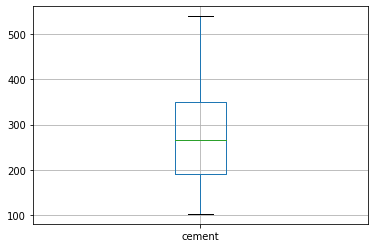

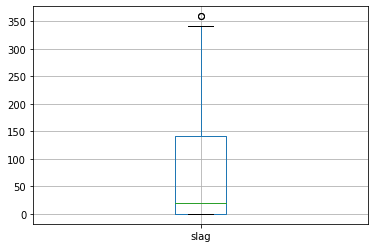

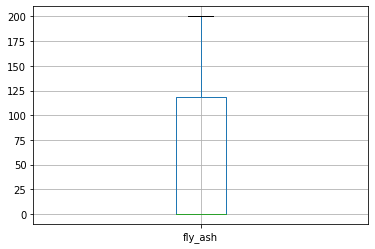

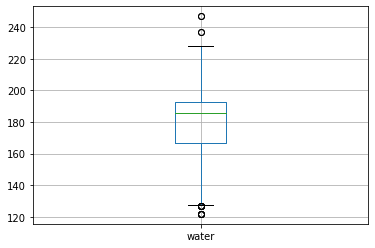

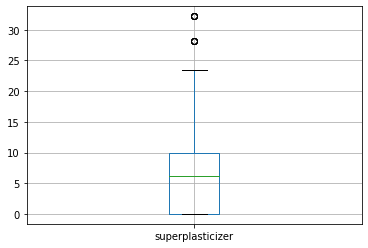

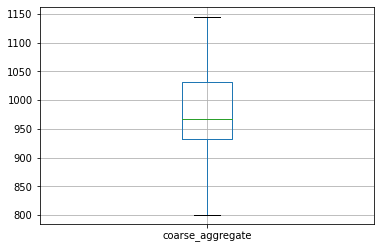

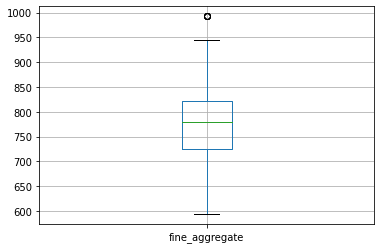

In [7]:
(df[['cement']].boxplot())
plt.show()
(df[['slag']].boxplot())
plt.show()
(df[['fly_ash']].boxplot())
plt.show()
(df[['water']].boxplot())
plt.show()
(df[['superplasticizer']].boxplot())
plt.show()
(df[['coarse_aggregate']].boxplot())
plt.show()
(df[['fine_aggregate']].boxplot())
plt.show()



Droping outliers

In [8]:
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


## 1.2 Feature Scaling

In [9]:
df=df.copy()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler() 
 
# make a copy of dataframe
scaled_features = df.copy()

col_names = ['cement', 'slag', 'fly_ash', 'water','superplasticizer','coarse_aggregate','fine_aggregate','age']
features = scaled_features[col_names]

# Use scaler of choice; here Standard scaler is used
features = scaler.fit_transform(features.values)

scaled_features[col_names] = features
scaled_features

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,1.736988,-0.140351,0.000000,-0.900114,-0.36,0.727273,-1.062308,0.000000,79.986111
1,1.736988,-0.140351,0.000000,-0.900114,-0.36,0.878788,-1.062308,0.000000,61.887366
2,0.426352,0.859649,0.000000,1.606532,-0.61,-0.363636,-1.899898,4.938776,40.269535
3,0.426352,0.859649,0.000000,1.606532,-0.61,-0.363636,-1.899898,6.877551,41.052780
4,-0.419404,0.788772,0.000000,0.239271,-0.61,0.105051,0.464760,6.775510,44.296075
...,...,...,...,...,...,...,...,...,...
1025,0.072006,0.673684,0.763507,-0.231675,0.28,-0.988889,-0.119510,0.000000,44.284354
1026,0.361294,-0.140351,0.977425,0.391189,0.43,-1.516162,0.341164,0.000000,31.178794
1027,-0.735851,0.837895,0.918238,0.265856,0.00,-0.763636,0.000000,0.000000,23.696601
1028,-0.668898,1.169825,0.000000,-0.383593,0.52,0.218182,0.090909,0.000000,32.768036


In [10]:
X = scaled_features.drop(columns=['strength'])
y = scaled_features['strength']

In [11]:
X

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,1.736988,-0.140351,0.000000,-0.900114,-0.36,0.727273,-1.062308,0.000000
1,1.736988,-0.140351,0.000000,-0.900114,-0.36,0.878788,-1.062308,0.000000
2,0.426352,0.859649,0.000000,1.606532,-0.61,-0.363636,-1.899898,4.938776
3,0.426352,0.859649,0.000000,1.606532,-0.61,-0.363636,-1.899898,6.877551
4,-0.419404,0.788772,0.000000,0.239271,-0.61,0.105051,0.464760,6.775510
...,...,...,...,...,...,...,...,...
1025,0.072006,0.673684,0.763507,-0.231675,0.28,-0.988889,-0.119510,0.000000
1026,0.361294,-0.140351,0.977425,0.391189,0.43,-1.516162,0.341164,0.000000
1027,-0.735851,0.837895,0.918238,0.265856,0.00,-0.763636,0.000000,0.000000
1028,-0.668898,1.169825,0.000000,-0.383593,0.52,0.218182,0.090909,0.000000


Features Corrolation

<AxesSubplot:>

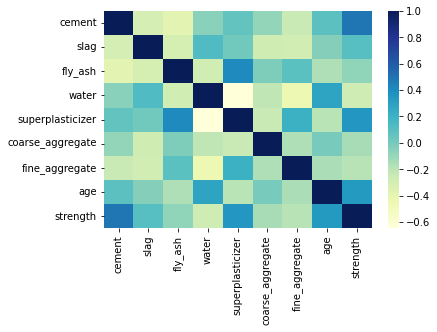

In [12]:
import seaborn as sns

corr = scaled_features.corr() # Pearson Correlation

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")


# 2.Modeling

## 2.1 Base Model (XGBRegressor)

Data Spliting

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Cross Validating

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#model = LinearRegression()
model= xg.XGBRegressor(objective='reg:squarederror')

scores = cross_val_score(model, X_train, y_train, cv=10)

base_model_score = scores.mean()

base_model_score

0.9023611671642146

KNN Model

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=1)

scores = cross_val_score(knn, X_train, y_train, cv=10)

base_model_score = scores.mean()

base_model_score

0.6547631929821878

In [16]:
from sklearn.model_selection import GridSearchCV

# Instanciate model
model = KNeighborsRegressor()

# Hyperparameter Grid
k_grid = {'n_neighbors' : [1,5,10,20,50]}

# Instanciate Grid Search
grid = GridSearchCV(model, k_grid, n_jobs=-1,  cv = 5)

# Fit data to Grid Search
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
grid.best_params_

{'n_neighbors': 5}

In [18]:
knn = KNeighborsRegressor(n_neighbors=5)

scores = cross_val_score(knn, X_train, y_train, cv=10)

base_model_score = scores.mean()

base_model_score

0.7026838369520164

XGBRegressor Model fine tunning


In [19]:
model= xg.XGBRegressor(objective='reg:squarederror',n_estimators=1000,learning_rate=0.05)

scores = cross_val_score(model, X_train, y_train, cv=10)

base_model_score = scores.mean()

base_model_score

0.911087679649443

In [20]:
model= xg.XGBRegressor(objective='reg:squarederror',n_estimators=1000,learning_rate=0.05)
trained_model = model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9121805298280934

We choose the "XGBRegressor" for better result

# 3.Input New Data 

In [21]:
print(df.columns.values.tolist())

['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'strength']


## 3.1 Test the sample

In [22]:
sample = [332.5,142.5,0.0,228.0,0.0,932.0,594.0,270]
column_names = ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']
new_sample= pd.DataFrame(data = [sample], columns = column_names)

#Scaling input
new_sample['cement'],new_sample['slag'],new_sample['fly_ash'],new_sample['water'],new_sample['superplasticizer'],new_sample['coarse_aggregate'],new_sample['fine_aggregate'],new_sample['age'] = scaler.transform(new_sample[['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']]).T
new_sample

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,0.426352,0.859649,0.0,1.606532,-0.61,-0.363636,-1.899898,4.938776


In [23]:
model.predict(new_sample)[0]

39.79971

## 3.2 Inputing new sample by user

### Please enter your concrete sample properties by order and run the cell

In [24]:
cement= 332.5
slag= 142.5
fly_ash= 0.0
water= 228.0
superplasticizer= 0.0
coarse_aggregate= 932.0
fine_aggregate= 594.0

## 💪 3.4 Run the the cell and get The average strength of the concrete samples at 1, 7, 14, and 28 days of age


In [25]:
age=[1,7,14,28]
prediction_list=[]
for item in age:
    sample = [cement, slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate,item]
    column_names = ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']
    new_sample= pd.DataFrame(data = [sample], columns = column_names)
    new_sample['cement'],new_sample['slag'],new_sample['fly_ash'],new_sample['water'],new_sample['superplasticizer'],new_sample['coarse_aggregate'],new_sample['fine_aggregate'],new_sample['age'] = scaler.transform(new_sample[['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']]).T
    prediction_list.append(model.predict(new_sample)[0])
    
mean_strength=(sum(prediction_list)/len(prediction_list))

print ("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print ("The average strength of your concrete sample at 1, 7, 14, and 28 days of age is", mean_strength , "MPa")
print ("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The average strength of your concrete sample at 1, 7, 14, and 28 days of age is 27.28439474105835 MPa
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# 📈(II) Finding a formula that estimates the compressive strength of concrete

In [26]:
df

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [29]:
from sklearn.linear_model import LinearRegression
X2 = df.drop(columns=['strength'])
y2 = df['strength']
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X2,y2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Make predictions using the testing set
y2_pred = LR.predict(X2)


In [32]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", LR.coef_)
print("Interception: \n", LR.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y1_test,y2_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y1_test,y2_pred))

Coefficients: 
 [ 0.11722086  0.09944526  0.0856315  -0.15262956  0.28337992  0.01562091
  0.01829086  0.11218111]
Interception: 
 -17.74808449080907


NameError: name 'y1_test' is not defined

In [ ]:
import statsmodels.formula.api as smf
model_s = smf.ols('strength ~cement+slag+fly_ash+water+superplasticizer+coarse_aggregate+fine_aggregate+age',  data=df).fit()
print(model_s.summary())

In [ ]:
predicted_streangth = model_s.predict(X2)
residuals = predicted_streangth - y2
residuals

In [ ]:
RMSE = (residuals.map(lambda x: x**2).sum() / len(residuals))**0.5
RMSE

In [ ]:
sns.histplot(residuals, kde=True, stat='density', discrete=True)
plt.title('residuals density plot')

In [ ]:
sns.histplot(y2, kde=True, stat='density', discrete=True)
sns.histplot(predicted_streangth, kde=True, stat='density', discrete=True)


In [ ]:
model_s.predict(X2.iloc[2])

### Strength Formula:

### Strength = (-17.7481) + 0.1172 ∗ cement + 0.0994 ∗ slag + 0.0856 ∗ fly ash - 0.1526 ∗ water + 0.2834 ∗ superplasticizer + 0.0156 ∗ coarse aggregate + 0.0183 ∗ fine aggregate +  0.1122 ∗ age

In [ ]:
((1+7+14+28)*0.1122)-17.7481

## The average strength of the concrete samples at 1, 7, 14, and 28 days of age:

Strength = (-12.13811) + 0.1172 ∗ cement + 0.0994 ∗ slag + 0.0856 ∗ fly ash - 0.1526 ∗ water + 0.2834 ∗ superplasticizer + 0.0156 ∗ coarse aggregate + 0.0183 ∗ fine aggregate + 0.1122

## ✅ Finish